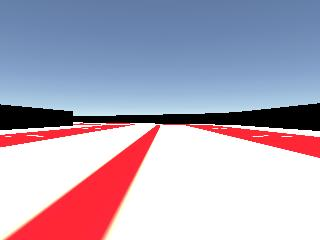

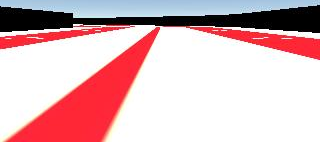

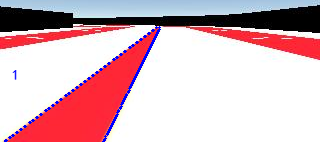

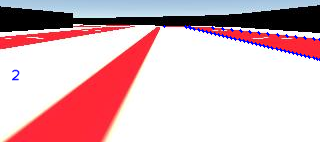

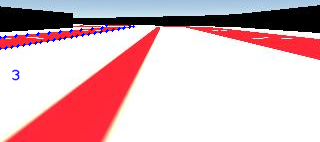

Two lane


In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def show(img):
  cv2_imshow(img)

def get_lane_type(img):
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  lane_count = 0
  run = 0;
  r1_mask = cv2.inRange(img_hsv, (0,100,120), (10,255,255))
  r2_mask = cv2.inRange(img_hsv, (170,100,120), (180,255,255))
  mask = np.repeat((r1_mask | r2_mask)[:, :, np.newaxis], 3, axis=2)
  #cv2_imshow(mask)
  img_masked = img.copy()
  img_masked[mask == 0] = 0       
  _,contours, hierarchy	= cv2.findContours((r1_mask|r2_mask), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:      
    area = cv2.contourArea(cnt)  
    x, y, w, h = cv2.boundingRect(cnt)           
    if area > 700:
      run += 1 
      temp_mask= img.copy()[y:y + h, x:x + w] 
      aaa = cv2.drawContours(img.copy(), cnt, -1, (255,0,0),2)        
      cv2.putText(aaa, str(run), (10, 80), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 1, cv2.LINE_AA)
      cv2_imshow(aaa)
      lane_count += 1
  if lane_count >= 2: 
      print('Two lane')
  else:
      print('One lane')


image = cv2.imread('1.jpg')
show(image)
cv2_imshow(image[98:240, 0:320])
get_lane_type(image[98:240, 0:320])
